# Hi!

Today we're going to dive into the second type of Machine Learning, which is **unsupervised learning**. 
We're going to create algorithms that will learn from the data itself, without any need from us to label it. Let's go!

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import solutions
import time

from ipywidgets import interact, fixed
import ipywidgets as widgets

from scipy.stats import norm, multivariate_normal
import cv2

np.random.seed(int(time.time()))
%matplotlib inline

## Use case 1: Clustering

There are many real-world cases, when a need arises to divide a dataset into various subgroups. Be it people, products or website articles. Sometimes there may not be any obvious ways to achieve that - fortunately, there are algorithms that can figure that out for us!

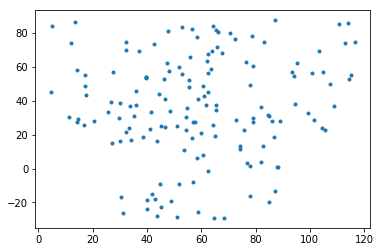

In [2]:
points = solutions.generate_mess(point_range=100)
X = points[:,0]
Y = points[:,1]

plt.scatter(X,Y, marker='.')
plt.show()

### K-means algorithm

The only thing we have to choose is the number of the clusters we want to achieve.

In [3]:
num_centroids = 3

* We initialize K cluster 'centroids' **randomly** in the space of the examples (represented by their features).
$$centroids = \mu_1, \mu_2, ... \mu_k$$
* repeatedly:
    * add every example to the cluster whose centroid it's the closest to
    * every centroid is reassigned as the mean of the examples in its' cluster

You can repeat the above steps either for a given number of steps or until the algorithm converges (the centroids move slower and slower) 

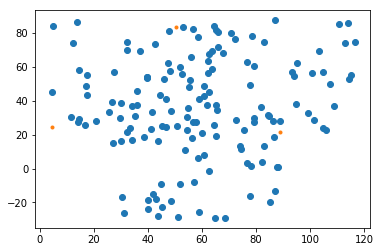

In [4]:
centroids = np.random.rand(num_centroids, 2) * 100 
plt.scatter(X, Y)
plt.scatter(centroids[:,0], centroids[:,1], marker='.')
plt.show()

In [5]:
def k_means_iteration(centroids, X, Y):
    # implement me!
    # return new positions of centroids

SyntaxError: unexpected EOF while parsing (<ipython-input-5-760af2099a1d>, line 3)

In [6]:
k_means_iteration = solutions.k_means_iteration

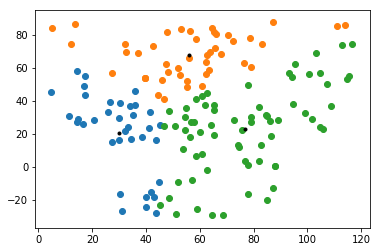

In [7]:
centroids, clusters = k_means_iteration(centroids, points)
for c in clusters:
    plt.scatter(X[c], Y[c])
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='.')
plt.show()


In [8]:
def demonstrate_k_means(k_means_iter, num_iterations, centroids, datapoints):
    _, clusters = k_means_iter(centroids, datapoints)

    centroids_diffs = np.zeros(centroids.shape)
    for i in range(num_iterations):
        prev_centroids = centroids
        centroids, clusters = k_means_iter(centroids, datapoints)
        centroids_diffs = centroids - prev_centroids

    for c in clusters:
        plt.scatter(datapoints[:, 0][c], datapoints[:, 1][c])

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='.')
    print(centroids_diffs)
    plt.show()

/home/unj/anaconda3/envs/thesis/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function solutions.demonstrate_k_means>

In [ ]:
num_centroids = 5
centroids = np.random.rand(num_centroids, 2) * 100
interact(demonstrate_k_means,
        k_means_iter=fixed(k_means_iteration),
        datapoints=fixed(points),
        centroids=fixed(centroids),
        num_iterations=widgets.IntSlider(min=0,max=20,step=1,value=0)
        )

## Use Case 2: Image compression

Let's talk pixels. Pixels are essentially datapoints of three features - RGB values.

If we take an image with all its' pixels, can we use K-Means to group those pixels into $n$ groups? In this case, centroids will be the 'most representative' colors of the picture. 

If instead of RGB values each pixel will now point to it's respective centroid - one of $n$ numbers - which will reduce the size (memory-wise) of image significantly, but still keep it looking great.

(334, 220, 3)


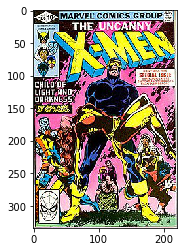

In [9]:
img = cv2.imread('img/phoenix.jpg')
print(img.shape)
# plt changes the rgb channels order... 
plt.imshow(img[:,:,[2,1,0]])

In [12]:
#number of colours we want to achieve
num_centroids = 3
centroids = np.random.rand(num_centroids, 3) * 255

In [13]:
interact(solutions.k_means_img_compression,
        k_means_iter=fixed(k_means_iteration),
        image=fixed(img),
        centroids=fixed(centroids),
        num_iterations=widgets.IntSlider(min=0,max=20,step=1,value=0)
        )

/home/unj/anaconda3/envs/thesis/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function solutions.k_means_img_compression>

## Use Case 3: Anomaly detection

Look at the below datapoints. You can see that most of them are centered around a certain value, but some are more distant than the others:

In [14]:
points = np.random.normal(size=(200, 2), loc=(-2,2), scale=2)
X_1 = points[:,0] 
X_2 = points[:,1] 

In [15]:
def show_messed_up(fun=(lambda X: X), X_1=X_1, X_2=X_2):
    plt.scatter(fun(X_1), fun(X_2))
    plt.show()
    plt.hist(fun(X_1), 20, normed=True)
    plt.hist(fun(X_2), 20, normed=True)
    plt.show()

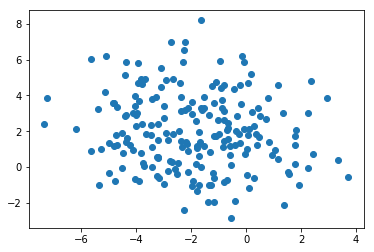

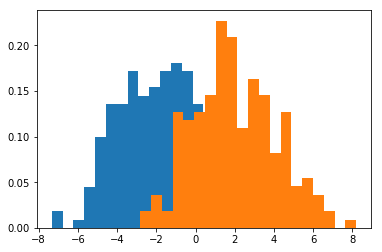

In [17]:
show_messed_up()

In this case, as in many real-life cases, X_1 and X_2 are spread according to Gaussian distribution (and if at the first glance they're not, there's usually some function of them that is).

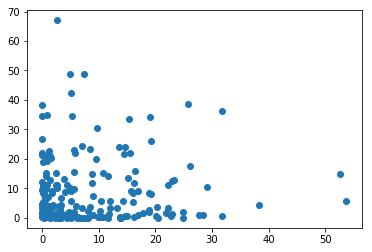

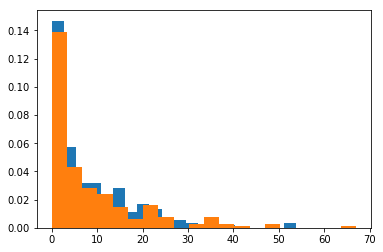

In [18]:
show_messed_up(lambda X: X **2)

Gaussian distribuition is defined by two parameters:

Mean:

$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)}
$$

Standard deviation:

$$
\sigma_j = \sqrt{\frac{1}{m}\sum_{i=1}^m(x_j^{(i)} - \mu_j)^2}
$$

Of course, we calculate those parameters separately for every feature of X.

Having calculated those parameters, we can then evaluate the probability for every datapoint:
    
$$
p(x) = \prod_{j=1}^n \frac{1}{\sqrt{2 \pi \sigma_j}} exp(-\frac{(x_j - \mu_j)^2}{2 \sigma^2_j})
$$

In [19]:
# thankfully, numpy has implemented that for us
means = points.mean(axis=0)
stds = points.std(axis=0)
means, stds

(array([-1.87902579,  2.0040007 ]), array([ 2.10405196,  2.0972764 ]))

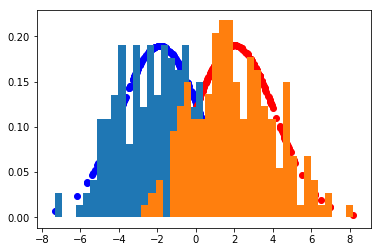

In [20]:
probabilities = norm.pdf(points, loc=means, scale=stds)

plt.hist(X_1, 30, normed=True)
plt.hist(X_2, 30, normed=True)
plt.scatter(X_1, probabilities[:, 0], color='b')
plt.scatter(X_2, probabilities[:, 1], color='r')
plt.show()

(array([ 13.,   8.,  10.,  13.,   4.,  14.,  15.,   8.,  12.,  14.,  11.,
          8.,   8.,  13.,   6.,   6.,  14.,   8.,  10.,   5.]),
 array([ 0.00046434,  0.00223817,  0.004012  ,  0.00578583,  0.00755965,
         0.00933348,  0.01110731,  0.01288114,  0.01465496,  0.01642879,
         0.01820262,  0.01997645,  0.02175027,  0.0235241 ,  0.02529793,
         0.02707176,  0.02884558,  0.03061941,  0.03239324,  0.03416707,
         0.03594089]),
 <a list of 20 Patch objects>)

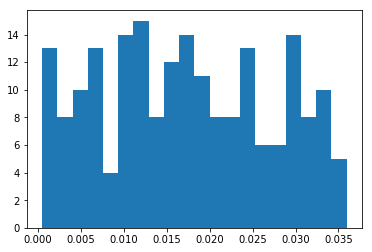

In [21]:
prob_mul = probabilities.prod(axis=1)
plt.hist(prob_mul,20)

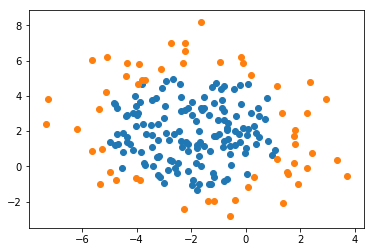

In [22]:
threshold = 0.01
valid_indices = np.argwhere(prob_mul > threshold)
invalid_indices = np.argwhere(prob_mul <= threshold)

plt.scatter(X_1[valid_indices], X_2[valid_indices])
plt.scatter(X_1[invalid_indices], X_2[invalid_indices])

plt.show()

In [ ]:
plt.contour()

### What if the features are not independent?
Let's take a look at objects represented by features which are somehow corelated.

ValueError: x and y must be the same size

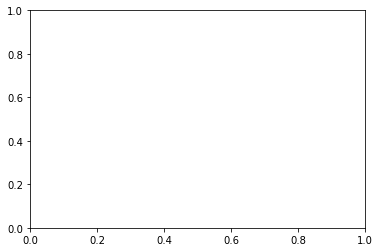

In [23]:
X_1 = np.linspace(1, 2,100)
X_2 = 2 * X_1 + np.random.normal(size=X_1.shape, scale=0.5)
plt.scatter(X_1, X_2) 
plt.show()
points = np.c_[X_1, X_2]

There are only two features here and you can see that there seems to be a realtion between them. However, while most of the examples seem to adhere to this trend, there are also some more anomalous ones.

### Enter multivariate Gaussian distribution!

The most basic version of Gaussian distribution was represented by mean and standard deviation.

Now, we'll update it a bit so that the mathematical model can learn to recognize relations between datapoints.


Mean remains the same:

$$
\mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}
$$

Now we'll use **covariance** matrix in the computations:

$$
\Sigma = \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu) (x^{(i)} - \mu)^T
$$

The new formula for probability is:

$$
p(x) = \prod_{j=1}^n \dfrac{1}{\sqrt{(2 \pi)^n |\Sigma|}} exp(-\frac{1}{2}(x - \mu)^T \Sigma^{-1}(x - \mu))
$$


In [24]:
means = points.mean(axis=0)    
cov = (1 / len(means)) * ((points - means).T @ (points - means))
# scipy <3
prob_mul = multivariate_normal.pdf(points, means, cov)
prob_mul.shape

(200,)

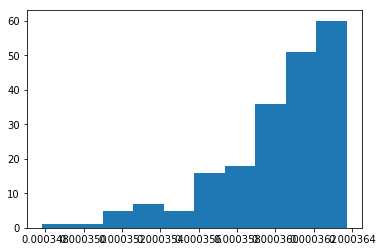

In [25]:
plt.hist(prob_mul)
plt.show()

In [26]:
threshold = 0.02215
valid_indices = np.argwhere(prob_mul > threshold)
invalid_indices = np.argwhere(prob_mul <= threshold)

plt.scatter(X_1[valid_indices], X_2[valid_indices])
plt.scatter(X_1[invalid_indices], X_2[invalid_indices])

plt.show()

IndexError: index 100 is out of bounds for axis 1 with size 100

## Use Case 4: Generating stuff

### Generative Adversarial Network

https://arxiv.org/abs/1406.2661

#### To oversimplify it:

* Discriminator - trained on real images and noise to decide whether an image is real or not
    * this **is** a kind of supervised learning, but we only label images as real and not real.
    
* Generator - maps latent random variables into images. Images are fed to discriminator which evaluates them and thus provides a feedback to Generator.

![](img/gan.jpg)

### Variable Autoencoder

https://arxiv.org/abs/1312.6114

* Encoder - compresses a large vector of features into a smaller vector of data

* Decoder - decodes the encoded data back into a vector of original size

* Training here means working on improving the accuracy of encoding/decoding

![](img/vae.jpg)

#### Let's see a VAE in action!

http://pytorch.org/

https://github.com/pytorch/examples/tree/master/vae